<hr style="border:2px solid #808080"> </hr>
<center><h1 style="color:#03122E;"> Álgebra Lineal Numérica IMT2111</h1></center>
<center><h1 style="color:#173F8A;"> Capítulo 1: Factorizacion QR</h3></center>
<center><h1 style="color:#0176DE;"> Prof. Manuel A. Sánchez</h3></center>
<hr style="border:2px solid #808080"> </hr>

## Tabla de contenidos

1. [Algoritmo de Gram Schmidt](#Algoritmo-de-Gram-Schmidt)
2. [Ejemplo: Factorizacion QR](#Ejemplo:-Factorizacion-QR)
3. [Ejemplo: QR solver](#Ejemplo:-QR-solver)
4. [Ejemplo: Gram Schmidt comparacion](#Ejemplo:-Gram-Schmidt-comparacion)
5. [Rotaciones y Reflexiones](#Reflexiones-y-Rotaciones)
6. [Algoritmo Householder Triangularizacion](#Algoritmo-Householder)
7. [Ejemplo: QR con Householder](#Ejemplo:-QR-con-Householder)
8. [Ejemplo: Householder comparacion 1](#Ejemplo:-Householder-comparacion-1)
9. [Ejemplo: Householder comparacion 2](#Ejemplo:-Householder-comparacion-2)
10. [Algoritmo rotaciones de Givens](#Algoritmo-rotaciones-de-Givens)
11. [Ejemplo: Givens paso a paso](#Ejemplo:-Givens-paso-a-paso)
12. [Ejemplo: Givens comparacion 1](#Ejemplo:-Givens-comparacion-1)
13. [Ejemplo: Givens comparacion 2](#Ejemplo:-Givens-comparacion-2)

In [1]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML
display(HTML("""<style>.output {display: flex;align-items: center;text-align: center;}</style>"""))

## Algoritmos de Gram Schmidt

- **Gram Schmidt clasico (inestable)**
- **Gram Schmidt modificado**

In [2]:
# 1.
def GramSchmidt_clasico(A):
    m = A.shape[0]; n = A.shape[1];
    R = np.zeros((n,n));
    Q = np.zeros((m,n));
    tol=1e-14
    for j in range(0, n):
        vj = A[:,j];
        for i in range(0,j):
            R[i,j] = np.dot(Q[:,i],A[:,j]);
            vj = vj - R[i,j]*Q[:,i];
        R[j,j] = np.linalg.norm(vj);
        if R[j,j] < tol:
            R[j,j] = 0 
            answer = input("Se encontro un vector l.d. Desea continuar? Y/N")
            if answer=="N":
                break
        else:
            Q[:,j] = (1.0/R[j,j])*vj
    return Q, R
# 2.
def GramSchmidt_modificado(A):
    m = A.shape[0]; n = A.shape[1];
    R = np.zeros((n,n));
    Q = np.zeros((m,n));
    v = np.zeros((m,n));
    for i in range(0, n):
        v[:,i] = A[:,i];
    for i in range(0, n):
        R[i,i] = np.linalg.norm(v[:,i]);
        Q[:,i] = (1.0/R[i,i])*v[:,i];
        for j in range(i,n):
            R[i,j] = np.dot(Q[:,i],v[:,j]);
            v[:,j]= v[:,j] - R[i,j]*Q[:,i];
    return Q, R

## Ejemplo: Factorizacion QR
Sea la matriz
\begin{equation}
A = \begin{bmatrix}
1 & 1 & 2 \\ 1 & 0 & -2 \\ -1 & 2 & 3 \end{bmatrix}
\end{equation}
Encuentre la factorizacion $A=QR$

In [3]:
A = np.array([[1 ,1, 2],[1, 0, -2],[-1,2,3]],dtype=np.float64)
Q, R = GramSchmidt_clasico(A)

print("*** Factorizacion A = QR: *** \n\n    Q = \n", Q, "\n\n    R = \n", R)
print("\n  * Calculamos A - QR = \n", A - Q@R)
print("\n  * Chequeamos si Q es ortogonal: ||Q^T Q - I|| = ", np.linalg.norm(Q.T@Q - np.eye(3)), "\n")

*** Factorizacion A = QR: *** 

    Q = 
 [[ 0.57735027  0.6172134   0.53452248]
 [ 0.57735027  0.15430335 -0.80178373]
 [-0.57735027  0.77151675 -0.26726124]] 

    R = 
 [[ 1.73205081 -0.57735027 -1.73205081]
 [ 0.          2.1602469   3.24037035]
 [ 0.          0.          1.87082869]]

  * Calculamos A - QR = 
 [[ 0.00000000e+00  0.00000000e+00  2.22044605e-16]
 [ 0.00000000e+00  5.96863333e-18 -2.22044605e-16]
 [ 0.00000000e+00  0.00000000e+00 -4.44089210e-16]]

  * Chequeamos si Q es ortogonal: ||Q^T Q - I|| =  4.563891378090311e-16 



## Ejemplo: QR solver

Resolver el sistema lineal $Ax= b$ usando la factorizacion $A=QR$.

\begin{equation}
A = \begin{bmatrix}
1&3&4&1 \\
2&1&5&1 \\
3&1&6&1 \\
6&2&3&2
\end{bmatrix},\quad
b = \begin{bmatrix}
3 \\ 2 \\ 1\\ 3
\end{bmatrix}
\end{equation}


In [4]:
def backward_substitution(U,b):
    '''
    Backward substitution algorithm for system U x = b
    input : U upper tringular matrix n x n
            b vector n x 1
    output : x solution of U x = b
    '''
    n = U.shape[0]; x = np.zeros(n)
    x[n-1] = b[n-1]/U[n-1,n-1]
    for i in range(n-2,-1,-1):
        x[i] = (b[i] - U[i,(i+1):n]@(x[(i+1):n]))/U[i,i]
    return x
    
def QRsolver(A,b):
    Q,R = GramSchmidt_clasico(A)
    x = backward_substitution(R, (Q.T).dot(b) )
    return x

In [5]:
A = np.array([[1,3,4,1],[2,1,5,1],[3,1,6,1],[6,2,3,2]],dtype=np.float64)
b = np.array([3,2,1,3], dtype=np.float64)

# Resolver el sistema de ecuaciones lineales para encontrar el flujo
sol = np.linalg.solve(A, b)
x = QRsolver(A,b)
print("sol exacta: ",sol)
print("sol QR    : ",x)

sol exacta:  [-0.88888889  0.         -0.11111111  4.33333333]
sol QR    :  [-8.88888889e-01 -1.34279955e-15 -1.11111111e-01  4.33333333e+00]


## Ejemplo: Gram Schmidt comparacion

Comparacion de algoritmos de Gram-Schmidt clasico vs. Gram Schmidt modificado

Resolvemos la factorizacion QR de la siguiente matriz
\begin{equation*}
A = 
\begin{bmatrix}
1 & 1 & \ldots &1 \\
\vdots &\vdots & \ddots &\vdots \\
1 & 1 & \ldots &1
\end{bmatrix}
+\epsilon
I, \quad A\in \mathbb R^{10\times 10}
\end{equation*}

In [6]:
ep = 10**(-7); n = 10
A = np.ones((n,n)) + ep*np.eye((n))

def printQRinfo(A, QRfun, algo='QR numpy'):
    n = A.shape[0]
    Q, R = QRfun(A)
    print("*** ",algo,"\n")
    print("    || A - QR ||2    :", np.linalg.norm(A -np.dot(Q,R)))
    print("    || Q.T@Q - I ||2 :", np.linalg.norm(Q.T@ Q-np.eye(n)))
    print("    || q1*q2 ||2     :", np.dot(Q[:,0], Q[:,1]))
    print("\n ")
    pass

printQRinfo(A, np.linalg.qr, algo="QR numpy.linalg")
printQRinfo(A, GramSchmidt_clasico, algo="Gram-Schmidt clasico")
printQRinfo(A, GramSchmidt_modificado, algo="Gram-Schmidt modificado")

***  QR numpy.linalg 

    || A - QR ||2    : 1.85775845048325e-15
    || Q.T@Q - I ||2 : 1.3847704561580154e-15
    || q1*q2 ||2     : -2.7755575615628914e-16

 
***  Gram-Schmidt clasico 

    || A - QR ||2    : 9.019494489765868e-16
    || Q.T@Q - I ||2 : 0.3674695563835977
    || q1*q2 ||2     : 2.3038121410579038e-10

 
***  Gram-Schmidt modificado 

    || A - QR ||2    : 1.0295784775289034e-15
    || Q.T@Q - I ||2 : 7.830815093173928e-09
    || q1*q2 ||2     : 2.3038121410579038e-10

 


## Reflexiones y Rotaciones

In [7]:
def Rotate(x,theta):
    Qrot = np.array([[np.cos(theta), np.sin(theta)],[-np.sin(theta), np.cos(theta)]], dtype=np.float64)
    return Qrot.T.dot(x)
def Reflect(x,theta):
    Qref = np.array([[np.cos(theta), np.sin(theta)],[np.sin(theta), -np.cos(theta)]], dtype=np.float64)
    return Qref.T.dot(x)

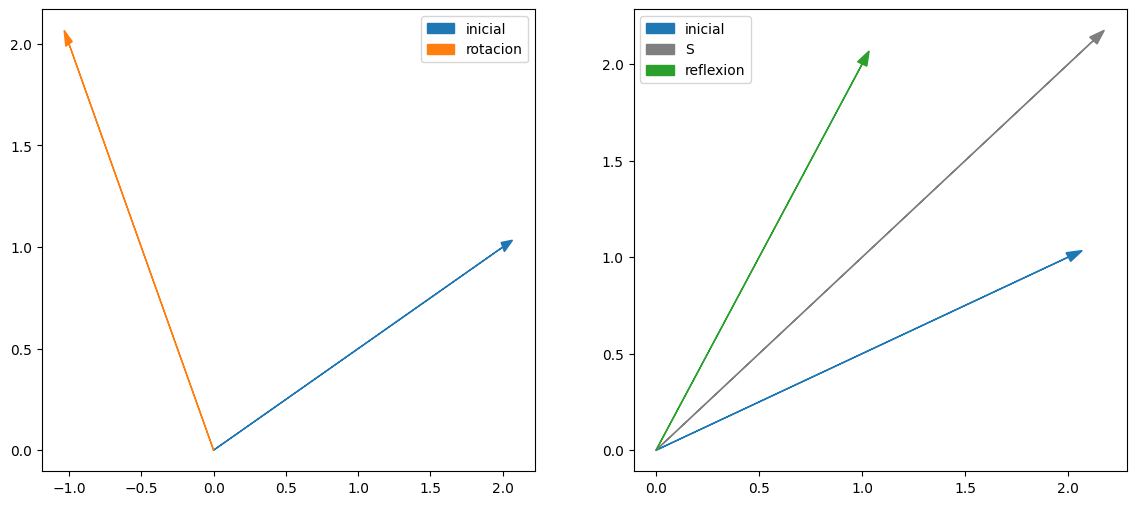

In [8]:
theta = np.pi/2.0
x = np.array([2,1], dtype=np.float64)
yrot = Rotate(x,theta)
yref = Reflect(x,theta) 

fig,ax = plt.subplots(1,2,figsize=(14,6))
ax[0].arrow(0, 0, x[0], x[1], head_width = 0.05, ec='C00', fc='C00' , label='inicial')
ax[0].arrow(0, 0, yrot[0], yrot[1], head_width = 0.05, ec='C01', fc='C01', label='rotacion')

ax[1].arrow(0, 0, x[0], x[1], head_width = 0.05, ec='C00', fc='C00' , label='inicial')
ax[1].arrow(0, 0, 3*np.cos(theta/2), 3*np.sin(theta/2), head_width = 0.05, ec='C07', fc='C07', label='S')
ax[1].arrow(0, 0, yref[0], yref[1], head_width = 0.05, ec='C02', fc='C02', label='reflexion')
ax[0].legend()
ax[1].legend()
plt.show()

## Algoritmo Householder

In [9]:
def house(x):
    '''
    Compute Householder vector
    Input: x \in \mathbb R^{m}
    Output: Householder vector v, with v[0]=1, and beta such that
            P = I-beta * v * v.T es orthogonal and Px = \|x\|*e_1
    '''
    m = x.size
    if m > 1:
        sigma = x[1:].dot(x[1:])
        v  = x.copy(); v[0] = 1.0
        if sigma == 0:
            beta = 0
        else:
            mu = np.sqrt(x[0]*x[0]+sigma)
            if x[0]<0:
                v[0] = x[0] - mu
            else:
                v[0] = -sigma/(x[0]+mu)
            beta = 2.0 * v[0]*v[0]/(sigma+v[0]**2)
            v = v / v[0]
        return v, beta
    else:
        return np.array([0.0]),0.0

def applyP(v, beta, x):
    # compute Px = (I - beta v v^T )x
    return x - beta * v.dot(x) * v

def Householder_qr(Ain):
    ''' 
    Compute QR decomposition using Householder
    update A in place with QR ... R is upper triangular (at and above diagonal)
    below the diagonal, A holds the "essential" parts of the Householder vectors.
    the essential part gets shorter because they are only applied to the remaining
    bottom right square of A
    Input : A, m\times n matrix
    Output: overwrite A
    '''
    A = Ain.copy()
    m,n = A.shape
    betas = np.empty(n)
    for j in range(n):
        # usando funcion house
        v, betas[j] = house(A[j:, j])
        A[j:,j:] -= betas[j] * np.outer(v, v.dot(A[j:,j:]))
        if j < m:
            A[j+1:,j] = v[1:m-j+1]
    
    R = np.triu(A)
    Q = fullQ_house(A, betas)
    return Q, R

def fullQ_house(A, betas):
    '''
    Take the "packed" Householder vectors stored in A's lower triangle,
    along with the respective \beta s and expand to a full Q matrix 
        (note, R still lives in A's upper triangle)
    '''
    m,n = A.shape
    Q = np.eye(n)
    for j in reversed(range(n)):
        v = A[j:,j].copy()
        v[0] = 1.0
        Q[j:,j:] = (np.eye(n-j) - betas[j] * np.outer(v,v)).dot(Q[j:,j:])
    return Q

## Ejemplo: QR con Householder

Sea la matriz
\begin{equation}
A = \begin{bmatrix}
1 & 1 & 2 \\ 1 & 0 & -2 \\ -1 & 2 & 3 \end{bmatrix}
\end{equation}
Encuentre la factorizacion $A=QR$

In [10]:
A = np.array([[1 ,1, 2],[1, 0, -2],[-1,2,3]],dtype=np.float64)
Q, R = Householder_qr(A)

print("*** Factorizacion A = QR: *** \n\n    Q = \n", Q, "\n\n    R = \n", R)
print("\n  * Calculamos A - QR = \n", A - Q@R)
print("\n  * Chequeamos si Q es ortogonal: ||Q^T Q - I|| = ", np.linalg.norm(Q.T@Q - np.eye(3)), "\n")

*** Factorizacion A = QR: *** 

    Q = 
 [[ 0.57735027  0.6172134   0.53452248]
 [ 0.57735027  0.15430335 -0.80178373]
 [-0.57735027  0.77151675 -0.26726124]] 

    R = 
 [[ 1.73205081 -0.57735027 -1.73205081]
 [ 0.          2.1602469   3.24037035]
 [ 0.          0.          1.87082869]]

  * Calculamos A - QR = 
 [[ 0.00000000e+00  9.99200722e-16  1.77635684e-15]
 [ 3.33066907e-16 -7.98203887e-16 -1.55431223e-15]
 [-3.33066907e-16  8.88178420e-16  2.66453526e-15]]

  * Chequeamos si Q es ortogonal: ||Q^T Q - I|| =  8.417974633764661e-16 



## Ejemplo: Householder comparacion 1

Comparacion de algoritmos de Gram-Schmidt clasico vs. Gram Schmidt modificado vs. Householder

Resolvemos la factorizacion QR de la siguiente matriz
\begin{equation*}
A = 
\begin{bmatrix}
 1 & \ldots &1 \\
\vdots & \ddots &\vdots \\
 1 & \ldots &1
\end{bmatrix}
+\epsilon
I, \quad A\in \mathbb R^{10\times 10}
\end{equation*}

In [11]:
ep = 10**(-7); n = 10
A = np.ones((n,n)) + ep*np.eye((n))

printQRinfo(A, np.linalg.qr, algo="QR numpy.linalg")
printQRinfo(A, GramSchmidt_clasico, algo="Gram-Schmidt clasico")
printQRinfo(A, GramSchmidt_modificado, algo="Gram-Schmidt modificado")
printQRinfo(A, Householder_qr, algo="Householder")

***  QR numpy.linalg 

    || A - QR ||2    : 1.85775845048325e-15
    || Q.T@Q - I ||2 : 1.3847704561580154e-15
    || q1*q2 ||2     : -2.7755575615628914e-16

 
***  Gram-Schmidt clasico 

    || A - QR ||2    : 9.019494489765868e-16
    || Q.T@Q - I ||2 : 0.3674695563835977
    || q1*q2 ||2     : 2.3038121410579038e-10

 
***  Gram-Schmidt modificado 

    || A - QR ||2    : 1.0295784775289034e-15
    || Q.T@Q - I ||2 : 7.830815093173928e-09
    || q1*q2 ||2     : 2.3038121410579038e-10

 
***  Householder 

    || A - QR ||2    : 3.1046568547376115e-15
    || Q.T@Q - I ||2 : 2.0229856393972296e-15
    || q1*q2 ||2     : 8.326672684688674e-17

 


## Ejemplo: Householder comparacion 2

Comparacion de algoritmos de Gram-Schmidt clasico vs. Gram Schmidt modificado vs. Householder

Resolvemos la factorizacion QR de la matriz de Hilbert
\begin{equation*}
A = 
\begin{bmatrix}
1 & 1/2 & \ldots &1/n \\
1/2& 1/3 & \ddots & \vdots \\
\vdots &\ddots & \ddots &1/(2n-2) \\
1/n & \ldots & 1/(2n-2) &1/(2n-1)
\end{bmatrix}
\end{equation*}

In [12]:
from scipy.linalg import hilbert
H = hilbert(10)

printQRinfo(H, np.linalg.qr, algo="QR numpy.linalg")
printQRinfo(H, GramSchmidt_clasico, algo="Gram-Schmidt clasico")
printQRinfo(H, GramSchmidt_modificado, algo="Gram-Schmidt modificado")
printQRinfo(H, Householder_qr, algo="Householder")

***  QR numpy.linalg 

    || A - QR ||2    : 7.379734683741013e-16
    || Q.T@Q - I ||2 : 1.4966911727351185e-15
    || q1*q2 ||2     : 1.3877787807814457e-16

 
***  Gram-Schmidt clasico 

    || A - QR ||2    : 1.1485913163110961e-16
    || Q.T@Q - I ||2 : 3.465983433241716
    || q1*q2 ||2     : 1.1934897514720433e-15

 
***  Gram-Schmidt modificado 

    || A - QR ||2    : 1.930459645366694e-16
    || Q.T@Q - I ||2 : 2.6141222185919056e-05
    || q1*q2 ||2     : 1.1934897514720433e-15

 
***  Householder 

    || A - QR ||2    : 8.127989414199748e-16
    || Q.T@Q - I ||2 : 1.6855043879505846e-15
    || q1*q2 ||2     : -2.7755575615628914e-16

 


## Algoritmo rotaciones de Givens

- **Rotacion de Givens simple dado dos valores** ``Givens``
- **vector Gx** ``computeGx``
- **Calcula la factorizacion QR usando Givens** ``Givens_qr``


In [13]:
def Givens(a,b):
    if b == 0:
        c = 1; s = 0
        return c, s
    else:
        if abs(b) > abs(a):
            tau = -a/b; s = 1.0/np.sqrt(1.0+tau*tau); c = s*tau
            return c, s
        else:
            tau = -b/a; c = 1.0/np.sqrt(1.0+tau*tau); s = c*tau
            return c, s

def computeGx(i,k,x):
    y = x.copy()
    (c, s) = Givens(x[i],x[k])  
    y[i] = c*x[i] - s*x[k]
    y[k] = s*x[i] + c*x[k]
    return y

def Givens_qr(Ain, plot=False):
    '''
    Compute QR decomposition of A m\times n
    Input :
    Output:
    '''
    A = Ain.copy()
    
    m, n = A.shape
    if plot:
        fig,ax = plt.subplots(3,5)
        listax = [axi for axi in ax.reshape(-1)]
        
        k= 0 
    for j in range(n):
        for i in reversed(range(j+1,m)):
            (c, s) = Givens(A[i-1,j],A[i,j])  
            A[[i-1,i],j:] = np.array([[c,-s],[s,c]])@A[[i-1,i],j:]
            if plot:
                listax[k].tick_params(left = False, right = False , bottom=False, top = False, labelleft = False , labelbottom = False) 
                listax[k].spy(A,precision=1e-14)
                k+=1
    if plot:
        plt.show()
    return A

## Ejemplo: Givens paso a paso


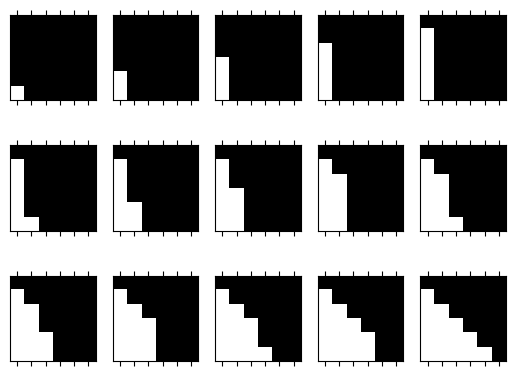

In [14]:
np.set_printoptions(precision=6)
x = np.array([1.0,2.0,3.0,4.0])
# print(1.0/np.sqrt(5.0), -2.0/np.sqrt(5.0))
computeGx(1,3,x)
A = hilbert(6)
newA = Givens_qr(A, plot=True)

## Ejemplo: Givens comparacion 1

Comparacion de algoritmos de Gram-Schmidt clasico vs. Gram Schmidt modificado vs. Householder

Resolvemos la factorizacion QR de la siguiente matriz
\begin{equation*}
A = 
\begin{bmatrix}
 1 & \ldots &1 \\
\vdots & \ddots &\vdots \\
 1 & \ldots &1
\end{bmatrix}
+\epsilon
I, \quad A\in \mathbb R^{10\times 10}
\end{equation*}

In [15]:
ep = 10**(-7); n = 2
A = np.ones((n,n)) + ep*np.eye((n))

printQRinfo(A, np.linalg.qr, algo="QR numpy.linalg")
printQRinfo(A, GramSchmidt_clasico, algo="Gram-Schmidt clasico")
printQRinfo(A, GramSchmidt_modificado, algo="Gram-Schmidt modificado")
printQRinfo(A, Householder_qr, algo="Householder")
printQRinfo(A, Givens_qr, algo="Rotaciones de Givens")

***  QR numpy.linalg 

    || A - QR ||2    : 2.482534153247273e-16
    || Q.T@Q - I ||2 : 1.7190408303919737e-16
    || q1*q2 ||2     : -1.1102230246251565e-16

 
***  Gram-Schmidt clasico 

    || A - QR ||2    : 0.0
    || Q.T@Q - I ||2 : 2.2986246322602965e-09
    || q1*q2 ||2     : 1.6253730583670745e-09

 
***  Gram-Schmidt modificado 

    || A - QR ||2    : 2.482534153247273e-16
    || Q.T@Q - I ||2 : 2.2986246322602965e-09
    || q1*q2 ||2     : 1.6253730583670745e-09

 
***  Householder 

    || A - QR ||2    : 4.577566798522237e-16
    || Q.T@Q - I ||2 : 2.963604307473951e-16
    || q1*q2 ||2     : -1.6653345369377348e-16

 
***  Rotaciones de Givens 

    || A - QR ||2    : 1.9999996999999823
    || Q.T@Q - I ||2 : 7.071068603825069


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed